Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB
None

Dataset Description:
               Year         Value
count  13979.000000  1.397900e+04
mean    1994.672866  1.207380e+12
std       17.731413  5.537517e+12
min     1960.000000  1.150263e+04
25%     1980.000000  2.233880e+09
50%     1996.000000  1.672591e+10
75%     2010.000000  2.058542e+11
max     2023.000000  1.054350e+14

Correlation Matrix:
          Year    Value
Year   1.00000  0.16743
Value  0.16743  1.00000


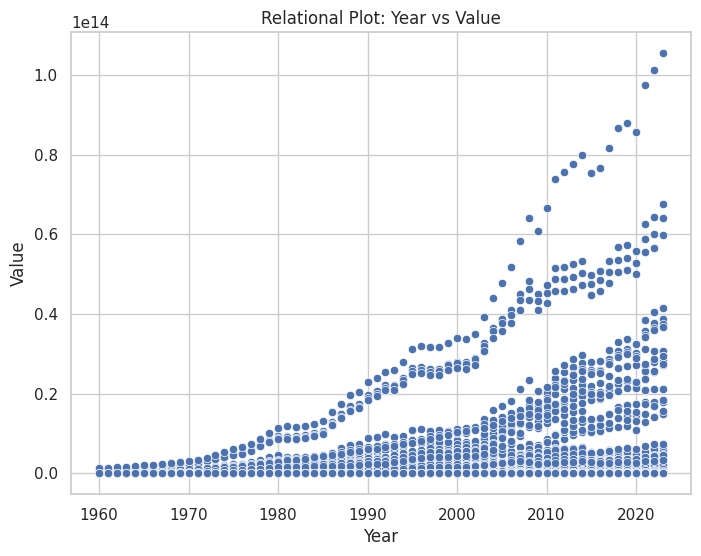

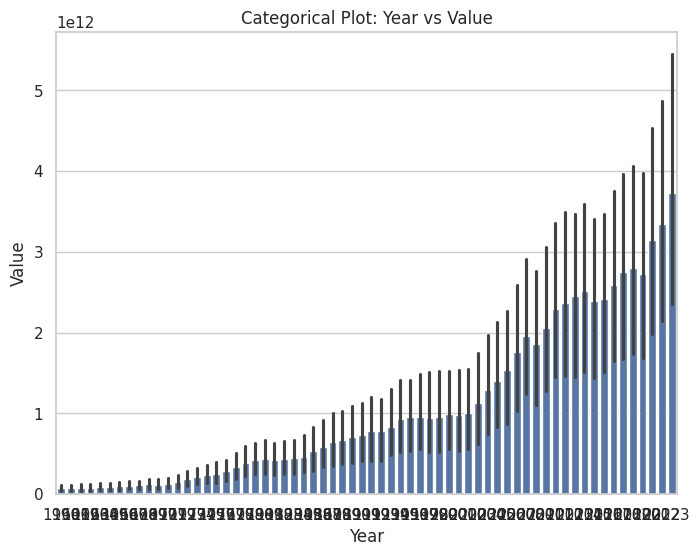

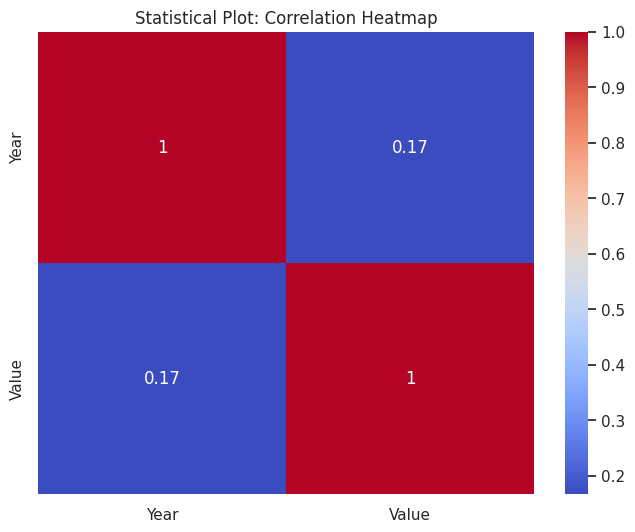

For the attribute Year:
Mean = 1994.67, Standard Deviation = 17.73, Skewness = -0.21, Excess Kurtosis = -1.07.
The data was not skewed and platykurtic.
Processed data saved at: /content/drive/MyDrive/ColabDatasets/processed_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

drive.mount('/content/drive')

file_path = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
gdp_data = pd.read_csv(file_path)

def preprocessing(gdp_data):
    gdp_data.dropna(inplace=True)
    gdp_data.drop_duplicates(inplace=True)
    print("Dataset Info:")
    print(gdp_data.info())
    print("\nDataset Description:")
    print(gdp_data.describe())
    numeric_gdp_data = gdp_data.select_dtypes(include=['number'])
    if numeric_gdp_data.empty:
        print("No numeric data available for correlation matrix.")
    else:
        print("\nCorrelation Matrix:")
        print(numeric_gdp_data.corr())
    return gdp_data

def plot_relational_plot(gdp_data):
    fig, ax = plt.subplots(figsize=(8, 6))
    numeric_gdp_data = gdp_data.select_dtypes(include=['number'])
    if numeric_gdp_data.shape[1] < 2:
        print("Not enough numeric columns for relational plot.")
        return
    sns.scatterplot(x=numeric_gdp_data.columns[0], y=numeric_gdp_data.columns[1], data=gdp_data, ax=ax)
    ax.set_title(f'Relational Plot: {numeric_gdp_data.columns[0]} vs {numeric_gdp_data.columns[1]}')
    plt.show()
    plt.savefig('relational_plot.png')
    plt.close()

def plot_categorical_plot(gdp_data):
    fig, ax = plt.subplots(figsize=(8, 6))
    numeric_gdp_data = gdp_data.select_dtypes(include=['number'])
    if numeric_gdp_data.shape[1] < 2:
        print("Not enough numeric columns for categorical plot.")
        return
    sns.barplot(x=numeric_gdp_data.columns[0], y=numeric_gdp_data.columns[1], data=gdp_data, ax=ax)
    ax.set_title(f'Categorical Plot: {numeric_gdp_data.columns[0]} vs {numeric_gdp_data.columns[1]}')
    plt.show()
    plt.savefig('categorical_plot.png')
    plt.close()

def plot_statistical_plot(gdp_data):
    fig, ax = plt.subplots(figsize=(8, 6))
    numeric_gdp_data = gdp_data.select_dtypes(include=['number'])
    if numeric_gdp_data.empty:
        print("No numeric data available for heatmap.")
        return
    sns.heatmap(numeric_gdp_data.corr(), annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Statistical Plot: Correlation Heatmap')
    plt.show()
    plt.savefig('statistical_plot.png')
    plt.close()

def statistical_analysis(gdp_data, col):
    mean = gdp_data[col].mean()
    stddev = gdp_data[col].std()
    skew = gdp_data[col].skew()
    excess_kurtosis = gdp_data[col].kurtosis()
    return mean, stddev, skew, excess_kurtosis

def writing(moments, col):
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, Standard Deviation = {moments[1]:.2f}, Skewness = {moments[2]:.2f}, Excess Kurtosis = {moments[3]:.2f}.')
    skewness = 'right' if moments[2] > 0.5 else 'left' if moments[2] < -0.5 else 'not'
    kurtosis = 'leptokurtic' if moments[3] > 0 else 'platykurtic' if moments[3] < 0 else 'mesokurtic'
    print(f'The data was {skewness} skewed and {kurtosis}.')

def main():
    global gdp_data
    gdp_data = preprocessing(gdp_data)
    numeric_gdp_data = gdp_data.select_dtypes(include=['number'])
    if numeric_gdp_data.empty:
        print("No numeric columns available for analysis.")
        return
    col = numeric_gdp_data.columns[0]
    plot_relational_plot(gdp_data)
    plot_categorical_plot(gdp_data)
    plot_statistical_plot(gdp_data)
    moments = statistical_analysis(numeric_gdp_data, col)
    writing(moments, col)
    processed_file_path = '/content/drive/MyDrive/ColabDatasets/processed_data.csv'
    gdp_data.to_csv(processed_file_path, index=False)
    print(f"Processed data saved at: {processed_file_path}")
    gdp_data.to_csv('processed_data.csv', index=False)
    files.download('processed_data.csv')

if __name__ == '__main__':
    main()
